In [2]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Vorgehen
Text importieren, mit nltk vorbereiten, mit spacy weiter bearbeiten.
1. Import

In [4]:
with open('/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles/13 vom 20. November 2008-11.txt', 'r') as file:
    # Read the contents of the file into a string
    text = file.read()

1.5 Weil DE und FR grundsätzlich anders gehandelt werden müssen, spalten wir hier die Texte in DE und FR auf.

In [5]:
from langdetect import detect

In [6]:
# Initialize empty strings for German and French text
text_de = ""
text_fr = ""

# Function to detect language and update corresponding text string
def update_text(line):
    global text_de, text_fr
    try:
        lang = detect(line)
        if lang == 'de':
            text_de += line + "\n"
        elif lang == 'fr':
            text_fr += line + "\n"
    except:
        # Handle language detection errors if any
        pass

# Read text file line by line
file_path = '/Users/j/Documents/GitHub/abschlussarbeit/pv_textfiles/13 vom 20. November 2008-11.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        update_text(line)

# Print or use the resulting text strings
print("German Text:\n", text_de)
print("\nFrench Text:\n", text_fr)

German Text:
 Sitzung vom Donnerstag, 20. November 2008, 18.00 Uhr 

Ort: 

Stadtratssaal in der Burg 

Olivier Ammann, Marc Arnold, Dana Augsburger-Brom, Niklaus Baltzer, Muriel Beck 

Kadima, Paul Blösch, Andreas Bösch, Urs Brassel, Patrick Calegari, Antonio Cataldo, 

Monique Esseiva, Erich Fehr, Pascal Fischer, Pierre-Yves Grivel, Urs Grob, Samuel 

Grünenwald, Roland Gurtner, Sonja Gurtner, Hanspeter Habegger, Markus 

Habegger, Regula Häberli-Gisiger, René Haefely, Peter Isler, Stefan Kaufmann, Nina 

Kuhn, Teres Liechti Gertsch, Christian Löffel, Claire Magnin, Joseline Marti-Stolz, 

Marlyse Merazzi, Peter Mischler, Émilie Moeschler, Michèle Morier-Genoud, Peter 

Moser, Alain Nicati, Pierre Ogi, Hugo Rindlisbacher, Silke Rindlisbacher Niklaus, 

Daphné Rüfenacht, Martin Rüfenacht, Thomas Rüfenacht, Martin Scherrer, Fatima 

Simon, Heidi Stöckli Schwarzen, Andreas Sutter, Barbara Tanner, Félicienne Villoz-

Lusamba, Alexandre Wenger, Carine Zuber 

Schwickert, Ariane Tonon, Mar

2. Vorbereitung mit nltk.
a. Zuerst auf Deutsch

In [7]:
words = word_tokenize(text_de)
words_alpha =[word.lower() for word in words if word.isalpha()]#gross- kleinschreibung ignorieren
stopwords = stopwords.words('german')
#stopwords.append("uhr")
#stopwords.append("november")#stopwords allenfalls manuell ergänzen oder dann mit spacy
#stopwords.append("facebook")
#stopwords.append("teilen")
result = [word for word in words_alpha if word not in stopwords]
text_de = (" ").join(result)
text_de

'sitzung donnerstag november uhr ort stadtratssaal burg olivier ammann marc arnold dana niklaus baltzer muriel beck kadima paul blösch andreas bösch urs brassel patrick calegari antonio cataldo monique esseiva erich fehr pascal fischer grivel urs grob samuel grünenwald roland gurtner sonja gurtner hanspeter habegger markus habegger regula rené haefely peter isler stefan kaufmann nina kuhn teres liechti gertsch christian löffel claire magnin joseline marlyse merazzi peter mischler émilie moeschler michèle peter moser alain nicati pierre ogi hugo rindlisbacher silke rindlisbacher niklaus daphné rüfenacht martin rüfenacht thomas rüfenacht martin scherrer fatima simon heidi stöckli schwarzen andreas sutter barbara tanner félicienne lusamba alexandre wenger carine zuber schwickert ariane tonon martin wiederkehr ariane bernasconi françois contini hubert klopfenstein moeschler jürg scherrer rené schlauri alain page seite postulat nina kuhn annelise wiederkehr groupe socialiste motion interpar

Und jetzt noch mit Französisch, stopwörter rauskicken und tokenizen. Dafür müssen wir die stopwords nochmals neu laden.

In [8]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords for French
nltk.download('stopwords')

# Get the list of French stop words
french_stopwords = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to /Users/j/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
words = word_tokenize(text_fr)
words_alpha =[word.lower() for word in words if word.isalpha()]#gross- kleinschreibung ignorieren
stopwords = stopwords.words('french')
#stopwords.append("uhr")
#stopwords.append("november")#stopwords allenfalls manuell ergänzen oder dann mit spacy
#stopwords.append("facebook")
#stopwords.append("teilen")
result = [word for word in words_alpha if word not in stopwords]
text_fr = (" ").join(result)
text_fr

'conseil ville stadtratsprotokoll séance jeudi novembre heures lieu salle conseil ville bourg présents anwesend marcel jonckheere andré montmollin marc despont rené eschmann absence excusée entschuldigt représentation conseil municipal vertretung gemeinderates nicolet absence excusée conseil municipal entschuldigt gemeinderat présidence vorsitz michèle présidente conseil ville regula klemmer secrétaire parlementaire secrétariat parlementaire affaires traitées behandelte geschäfte approbation jour communications bureau conseil ville prolongation délai approbation août no allocations enfants modification droit rang supérieur adaptation règlement personnel municipale bienne motion peter moser fdp modification règlement esb baisse tarifs lieu répartition excessive bénéfices caisse ville motion claire magnin verts bienne bien public postulat martin rüfenacht fdp place route biennois postulat rené haefely groupe psl comptage trafic routier nouveau système prêt vélos bienne motivations postul

### Jetzt mit spacy.

Zuerst auf Deutsch. Die trainierte de-pipeline laden

In [10]:
nlp = spacy.load("de_core_news_sm")
import de_core_news_sm
nlp = de_core_news_sm.load()

...und jetzt ein doc-Objekt bilden und de Substantive rausfischen

In [11]:
doc = nlp(text_de)
#substantive = []
lemmas = [str(token.lemma_) for token in doc]
text_de = (" ").join(lemmas)

In [12]:
text_de

'Sitzung Donnerstag November Uhr Ort Stadtratssaal Burg Olivier Ammann Marc Arnold Dana niklaus Baltzer Muriel Beck kadima Paul Blösch Andreas Bösch urs brassel Patrick Calegari antonio Cataldo monique esseiva Erich Fehr Pascal Fischer grivel Urs grob Samuel Grünenwald Roland Gurtner Sonja Gurtner Hanspeter Habegger Markus Habegger Regula René Haefely Peter Isler Stefan Kaufmann Nina kuhn teres liechti Gertsch Christian Löffel Claire Magnin Joseline Marlyse Merazzi Peter Mischler émilie Moeschler Michèle Peter Moser Alain Nicati Pierre ogi Hugo Rindlisbacher Silke Rindlisbacher Niklaus daphné Rüfenacht Martin Rüfenacht Thomas Rüfenacht Martin Scherrer fatima Simon heidi Stöckli schwarzen Andreas Sutter Barbara Tanner félicienne Lusamba alexandre Wenger Carine Zuber schwickern Ariane tonon Martin Wiederkehr ariane Bernasconi François Contini Hubert Klopfenstein Moeschler Jürg Scherrer René Schlauri Alain Page Seite Postulat Nina Kuhn annelise wiederkehr groupe socialiste Motion interpar

Noch zwecks Darstellung Substantive in eine Liste packen und dann auf diese CH Karte projizieren

In [14]:
substantive_de = []
#lemmas = [str(token.lemma_) for token in doc]
for token in doc:
    if "NOUN" in token.pos_:
        substantive_de.append(str(token.lemma_))
text_de = (" ").join(substantive_de)

In [15]:
text_de

'Sitzung Donnerstag November Uhr Ort Stadtratssaal Ammann Baltzer Fehr Regula Marlyse émilie Rindlisbacher Niklaus Lusamba Bernasconi Moeschler Scherrer Seite Postulat Motion Rindlisbacher Psl Rindlisbacher Psl Interpellation Postulat Motion Postulat kadima Motion Ratssekretärin Stadtratsbüro Sitzung November Vorstoss Begründung Motion Biel émilie Moeschler Psr Gewährung Verein Gemeinderat Fall Villa Geschäft Anpassung Recht Spielraum Betrag Parlament Stadt Million mehrkosten Million Kanton Stadt März Bundesgesetz Vorlage Juni Gesetz Kinderzulag Bund Minimum Gesetz Rat System Höhe zulagen Wahl Kasse Bericht Familienausgleichskasse Markt Zugang verbänden Biel Angebot Institution kantons Oekb wahrnehmen Kasse Folge Gemeinwes Kindergeldabrechnung Kosten Stadt mehrausgaben Konto kinderzulagen Hälfte Kasse Lohnsumme Kind beiträge Kind Lohn Regelung ehepaar Rolle Gemeinwes lohnsumme kinderzahl Abklärung Kasse Oekb Grund Ausschreibung Gemeinderat Abschaffung Kinderzulag Treuegeschenk Flurbere

### Erste Analyse von Nomina
Jetzt wollen wir mal nach den häufigsten Wörtern zählen.

In [16]:
from collections import Counter

In [17]:
word_counts = Counter(substantive_de)

# Print the most common words and their frequencies
print("Most Common Words:")
for word, count in word_counts.most_common(400):  # Adjust the number as needed
    print(f"{word}: {count}")

Most Common Words:
Stadt: 154
Fraktion: 153
Gemeinderat: 151
Motion: 98
Herr: 76
Stadtrat: 74
Frage: 68
Jahr: 66
Beantwortung: 52
Postulat: 50
Biel: 38
Forum: 38
Strom: 36
Grund: 34
Antwort: 32
Frau: 32
Meinung: 30
Sinn: 28
Bzw: 28
Unternehmen: 26
Name: 26
Kind: 24
Zeit: 24
Energie: 22
Einnahme: 22
Kurs: 22
System: 20
Problem: 20
Strompreis: 20
Einbürgerung: 20
Scherrer: 18
Interpellation: 18
AG: 18
Person: 18
Vorstoss: 16
Kosten: 16
Treuegeschenk: 16
Diskussion: 16
Aspekt: 16
Auge: 16
stadtkasse: 16
Vergleich: 16
Preis: 16
Ziel: 16
Bereich: 16
Kommission: 16
Baltzer: 14
Rindlisbacher: 14
Geschäft: 14
Zusammenhang: 14
Wohnsitzzulage: 14
Aufmerksamkeit: 14
Kompetenz: 14
Steuer: 14
esb: 14
Gewinn: 14
Interesse: 14
Transparenz: 14
Möglichkeit: 14
Projekt: 14
Unterstützung: 14
Baudirektor: 14
Beispiel: 14
Sitzung: 12
Fall: 12
Kanton: 12
Markt: 12
Arbeit: 12
Änderung: 12
Antrag: 12
Sicht: 12
Appetit: 12
Finanzdirektor: 12
Medium: 12
Umsatz: 12
Partei: 12
Bieler: 12
strompreise: 12
Forderung

Wörter, die hier herausstechen:

* Strom, Energie, Energiepreis
* Einbürgerung
* Scherrer
* Stadtkasse, ... (und ähnliche)

### Idee
Wie könnte man eine schlaue Analyse laufen lassen? 

* 12 Monate Top 100 anschauen und vergleichen?

* **Zuerst** aber Müll wie Stadtrat, Gemeinderat, Motionär, etc. rausnehmen. Dafür das nltk anpassen: Die Top-200 von allen, zusammengenommen, anschauen, und dann einen Filter erstellen.

* Und auch zuerst: nach sprachen aufsplitten und in separaten Notebooks de und fr analysieren, sonst gibts ein Gmües.

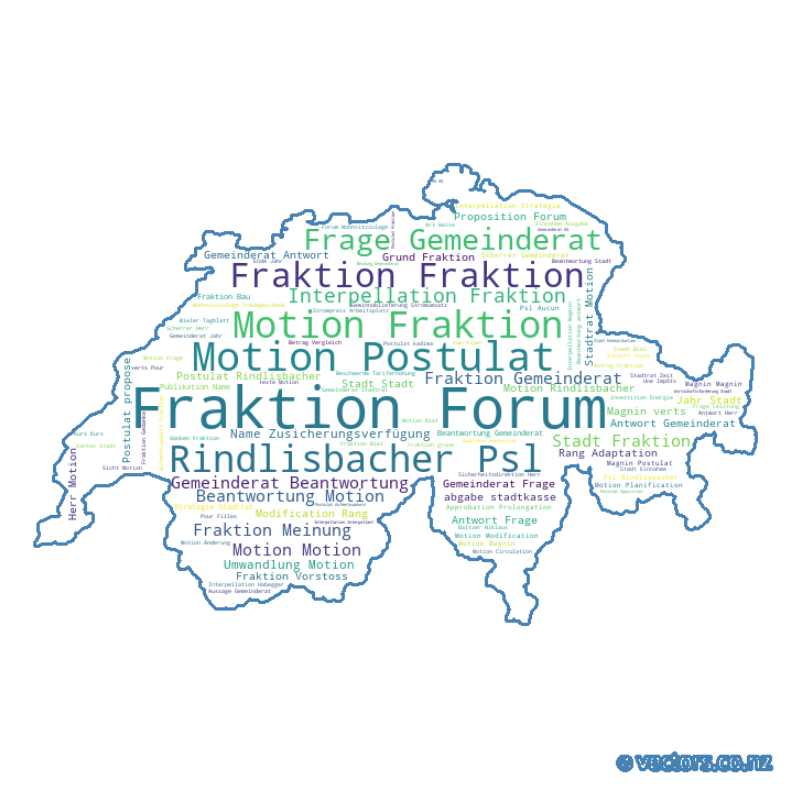

In [8]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(collocation_threshold=1,background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=True, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Beobachtung
Braucht noch einige stopwords...

* Fraktion
* Motion
* Gemeinderat
* Beantwortung
* Vorstoss
* Interpellation

Allenfalls interessant? 
* Stadtkasse / Finanzen / ... -> Ein Cluster, wo es um Geld geht.